In [1]:
!pip install tensorflow_datasets

In [2]:
%run ../input/python-recipes/h5file2data.py
dhtml('File Writing')

In [3]:
%%writefile tfdata2h5.py
import numpy as np,os,h5py
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing \
import image as tkimg

def tfdata2h5(data_name,names,num_points,img_size):
    ds=tfds.load(data_name,split='train',
                 shuffle_files=True,
                 as_supervised=True)
    h5file=data_name+str(img_size)+'.h5'
    images=np.zeros((num_points,img_size,img_size,3),
                     dtype='float32')
    labels=np.zeros((num_points,),dtype='int32')
    i=0
    for img,lbl in ds.take(num_points):
        img=tkimg.smart_resize(
                img,(img_size,img_size))
        images[i,:]=img.numpy()/255
        labels[i]=lbl; i+=1
    maxlen=max([len(n) for n in names])
    names=np.array([np.string_(name) 
                    for name in names])
    with h5py.File(h5file,'w') as f:
        f.create_dataset('images',data=images,
                         compression='gzip')
        f.create_dataset('labels',data=labels,
                         compression='gzip')
        f.create_dataset('names',data=names,
                         dtype='S%d'%maxlen,
                         compression='gzip')
        f.close()
    print('\nfile size: %s'%list(os.stat(h5file))[6])
    return h5file

Writing tfdata2h5.py


In [4]:
%run tfdata2h5.py

In [5]:
dhtml('Data Type #4 => TF Datasets')

In [6]:
data_name1='tf_flowers'
names1=['dandelion','daisy','tulips',
        'sunflowers','roses']
num_points1,img_size1=3670,128
h5file1=tfdata2h5(data_name1,names1,
                  num_points1,img_size1)



Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.0. Subsequent calls will reuse this data.

file size: 610563374


,train,valid,test
image shape,"(2936, 128, 128, 3)","(367, 128, 128, 3)","(367, 128, 128, 3)"
image type,float32,float32,float32
label shape,"(2936,)","(367,)","(367,)"
label type,int32,int32,int32


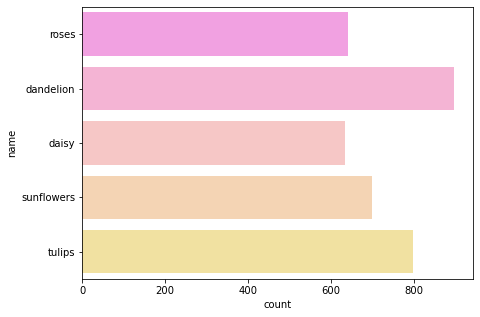

In [7]:
names1,x_train1,x_valid1,x_test1,\
y_train1,y_valid1,y_test1=\
h5file2data(h5file1,'spring')

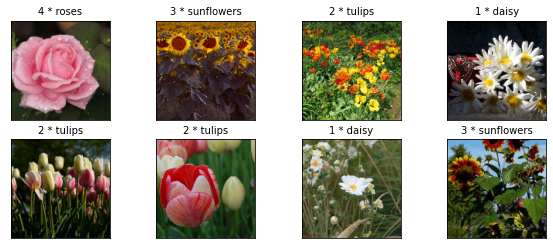

In [8]:
display_images(x_train1,y_train1,names1,8)

In [9]:
data_name2='cats_vs_dogs:4.0.0'
names2=['cat','dog']
num_points2,img_size2=23000,96
h5file2=tfdata2h5(data_name2,names2,
                  num_points2,img_size2)

/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:986: InsecureRequestWarning: Unverified HTTPS request is being made to host 'download.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteVSHZRM/cats_vs_dogs-train.tfrecord



Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.

file size: 2175423559


,train,valid,test
image shape,"(18400, 96, 96, 3)","(2300, 96, 96, 3)","(2300, 96, 96, 3)"
image type,float32,float32,float32
label shape,"(18400,)","(2300,)","(2300,)"
label type,int32,int32,int32


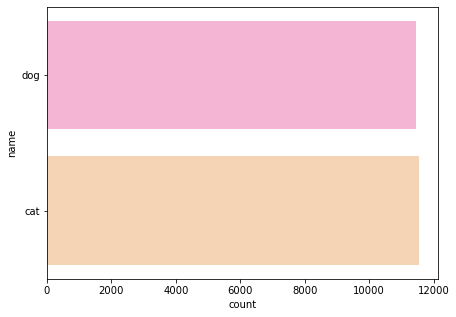

In [10]:
names2,x_train2,x_valid2,x_test2,\
y_train2,y_valid2,y_test2=\
h5file2data(h5file2,'spring')

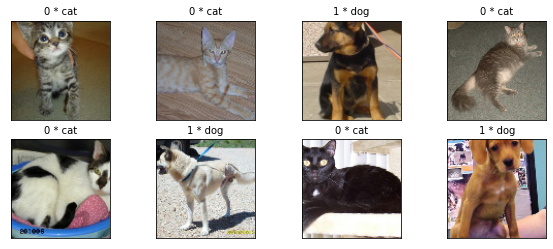

In [11]:
display_images(x_train2,y_train2,names2,8)